In [5]:
import numpy as np
import pandas as pd

In [6]:
file = pd.read_csv("6_8_10kmer_MIC_table.csv", index_col = 0)

In [9]:
file['MIC'].value_counts().to_csv('MIC_value_counts.csv')

In [4]:
len(file.columns)

559495

In [5]:
from sklearn.datasets import load_iris
import xgboost as xgb
from xgboost import plot_importance
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

# read in the iris data
iris = load_iris()

X = iris.data
y = iris.target

In [6]:
X = file.iloc[:, :-1]

In [7]:
y = file.iloc[:, -1]

In [17]:
len(X.columns)

559494

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234565)

params = {
    'booster': 'gbtree',
    'objective': 'multi:softmax',
    'num_class': 17,
    'gamma': 0.1,
    'max_depth': 6,
    'lambda': 2,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'min_child_weight': 3,
    'silent': 1,
    'eta': 0.1,
    'seed': 1000,
    'nthread': 4,
}

plst = params.items()

In [9]:
dtrain = xgb.DMatrix(X_train, y_train)
num_rounds = 500
model = xgb.train(plst, dtrain, num_rounds)

# 对测试集进行预测
dtest = xgb.DMatrix(X_test)
ans = model.predict(dtest)

/home/jbgong/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [10]:
ans

array([ 1., 16.,  1., 16.,  1.,  8.,  1.,  1.,  1.,  8.,  1.,  1.,  1.,
        1.,  1., 16.,  1.,  1., 16.,  8.,  1., 16.], dtype=float32)

Accuracy: 90.91 % 


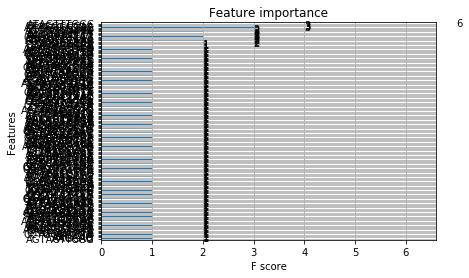

In [11]:
# 计算准确率
cnt1 = 0
cnt2 = 0
for i in range(len(y_test)):
    if ans[i] == y_test[i]:
        cnt1 += 1
    else:
        cnt2 += 1

print("Accuracy: %.2f %% " % (100 * cnt1 / (cnt1 + cnt2)))

# 显示重要特征
plot_importance(model)
plt.show()

In [12]:
data2 = sorted(model.get_score().items(), key = lambda item:item[1], reverse = True)

In [13]:
np.save('6_8_10_kmrs_feat.npy', data2)

In [3]:
import numpy as np
import pandas as pd
data2 = np.load('6_8_10_kmrs_feat.npy')
pd.DataFrame(columns = ['kmer', 'f-score'], data=data2).to_csv('6_8_10_kmrs_feat.csv', index=None)

In [4]:
data2

array([['ATAGTTTGGC', '6'],
       ['CGCCTCGTAC', '3'],
       ['AACTAGACGG', '3'],
       ['TTACGCCCAA', '3'],
       ['CCACAACCAA', '2'],
       ['GGGCGTAA', '2'],
       ['CGCCGCTACC', '2'],
       ['AACAGACAAA', '2'],
       ['TATCTCCCAA', '2'],
       ['CACACGCAAG', '2'],
       ['ACGGCCTTCA', '2'],
       ['AACAAATTCT', '2'],
       ['AAGCGCCCTT', '2'],
       ['ATTTAGGCTA', '2'],
       ['CTTCATTA', '2'],
       ['ACCGCCGCCT', '2'],
       ['AGTACTTCGG', '1'],
       ['AAGCAC', '1'],
       ['AACAAG', '1'],
       ['AATCTA', '1'],
       ['CCTGCGCCAG', '1'],
       ['CGATCTTC', '1'],
       ['CTAACCGATA', '1'],
       ['CACCCCTGTA', '1'],
       ['AGACGGTGAC', '1'],
       ['AAGACCCATC', '1'],
       ['ACACCTTCGA', '1'],
       ['GATGGTATGA', '1'],
       ['ATTTACGGTA', '1'],
       ['CGTATGCCAC', '1'],
       ['AGGAGCAGAG', '1'],
       ['TGTCGCTCAA', '1'],
       ['CTAGGTTCAC', '1'],
       ['ATATTGAAGA', '1'],
       ['GCTTTTGCGA', '1'],
       ['ACACAATAGG', '1'],
       ['C